In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. **Load the data :**
- Read the “housing.csv” file from the folder into the program.
- Print first few rows of this data.
- Extract input (X) and output (Y) data from the dataset

- ***Read the “housing.csv” file from the folder into the program.***

In [2]:
data_df = pd.read_excel("Dataset/1553768847_housing.xlsx")

- ***Print first few rows of this data.***

In [3]:
data_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
data_df.shape

(20640, 10)

In [5]:
data_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


- ***Extract input (X) and output (Y) data from the dataset.***

In [7]:
X = data_df.drop('median_house_value', axis=1)
y = data_df['median_house_value']

In [8]:
print(X.shape)
print(y.shape)

(20640, 9)
(20640,)


## 2. **Handle missing values :**
- Fill the missing values with the mean of the respective column.

In [9]:
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [10]:
round(X['total_bedrooms'].mean())

538

In [11]:
X['total_bedrooms'] = X['total_bedrooms'].fillna(round(X['total_bedrooms'].mean()))

In [12]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [13]:
y.isnull().sum()

0

In [14]:
X["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
X = pd.get_dummies(X, prefix={'ocean_proximity':'ocean_proximity'},drop_first=False)

In [16]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


## 3. **Encode categorical data :**
- Convert categorical column in the dataset to numerical data.

In [17]:
# from sklearn.preprocessing import LabelEncoder 

# L_encoder = LabelEncoder() # instantiating the Label Encoder 

# X["ocean_proximity"] = L_encoder.fit_transform(X["ocean_proximity"])

# print(X["ocean_proximity"])

In [18]:
X.dtypes

longitude                     float64
latitude                      float64
housing_median_age              int64
total_rooms                     int64
total_bedrooms                float64
population                      int64
households                      int64
median_income                 float64
ocean_proximity_<1H OCEAN       uint8
ocean_proximity_INLAND          uint8
ocean_proximity_ISLAND          uint8
ocean_proximity_NEAR BAY        uint8
ocean_proximity_NEAR OCEAN      uint8
dtype: object

## 4. **split the dataset :**
- Split the data into 80% training dataset and 20% test dataset.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 21)

In [21]:
print('The shape of X_train:-', X_train.shape)
print('The shape of X_test:-', X_test.shape)
print('The shape of y_train:-', y_train.shape)
print('The shape of y_test:-', y_test.shape)

The shape of X_train:- (16512, 13)
The shape of X_test:- (4128, 13)
The shape of y_train:- (16512,)
The shape of y_test:- (4128,)


## 5. **Standardize data :**
- Standardize training and test datasets.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 6. **Perform Linear Regression :**
- Perform Linear Regression on training data.
- Predict output for test dataset using the fitted model.
- Print root mean squared error (RMSE) from Linear Regression.

[ HINT: Import mean_squared_error from sklearn.metrics ]

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lin_model = LinearRegression()

In [27]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [28]:
print("The intercept for the Linear regression model that was fit on the boston training dataset is", lin_model.intercept_)

The intercept for the Linear regression model that was fit on the boston training dataset is 206713.46705426337


In [29]:
print("The regression co-efficient values for all the features")
print(lin_model.coef_)

The regression co-efficient values for all the features
[-53863.03661377 -55084.2825628   13330.79209516  -7731.9798013
  25011.90964176 -48855.0877386   36503.3267009   73279.95870729
   6033.82312926 -12198.13633358   2918.60052204   2420.87336279
   5556.10496678]


In [30]:
y_test_pred = lin_model.predict(X_test)
y_test_pred

array([ 23963.06829316,  67535.10139511, 201642.1009283 , ...,
       114952.71611553, 245840.38725983, 183193.75110808])

In [31]:
from sklearn.metrics import mean_squared_error

lrmodelrmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 70471.41489880317


In [32]:
pd.DataFrame({"Actual Train Values" : y_test , "Model Predictions" :  y_test_pred})

,Actual Train Values,Model Predictions
18726,98800,23963.068293
1046,157200,67535.101395
15508,160900,201642.100928
828,206500,285166.779669
19007,101700,118372.360485
...,...,...
17027,426400,341086.220103
19373,173300,153013.394461
6129,141000,114952.716116
5466,414300,245840.387260


In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_test,y_test_pred)

0.6305959961557546

## 7. Perform Decision Tree Regression :
- Perform Decision Tree Regression on training data.
- Predict output for test dataset using the fitted model.
- Print root mean squared error from Decision Tree Regression.

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dec_tree_reg = DecisionTreeRegressor(max_depth=5)

In [37]:
dec_tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [38]:
y_train_pred_dec = dec_tree_reg.predict(X_train)

In [39]:
dec_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred_dec))
print("RMSE value for Linear regression is", dec_rmse)

RMSE value for Linear regression is 68995.3779254009


In [40]:
y_test_pred_dec = dec_tree_reg.predict(X_test)

In [41]:
dec_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred_dec))
print("RMSE value for Linear regression is", dec_rmse)

RMSE value for Linear regression is 71699.42161494911


In [42]:
pd.DataFrame({"Actual Test Values" : y_test , "Model Predictions" :  y_test_pred_dec})

,Actual Test Values,Model Predictions
18726,98800,80903.896283
1046,157200,106281.882591
15508,160900,172781.345566
828,206500,275879.269142
19007,101700,80903.896283
...,...,...
17027,426400,324337.128671
19373,173300,123722.198953
6129,141000,144258.844327
5466,414300,205800.364787


# 8. Perform Random Forest Regression 

- Perform Random Forest Regression on training data.
- Predict output for test dataset using the fitted model.
- Print RMSE (root mean squared error) from Random Forest Regression.

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
RFR = RandomForestRegressor(n_estimators=50)

In [45]:
RFR.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [46]:
y_train_pred_dec = RFR.predict(X_train)

In [47]:
rfr_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred_dec))
print("RMSE value for Linear regression is", rfr_rmse)

RMSE value for Linear regression is 18711.348018904962


In [48]:
y_test_pred_dec = RFR.predict(X_test)

In [49]:
dec_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred_dec))
print("RMSE value for Decision tree is", dec_rmse)

RMSE value for Decision tree is 52588.02995616048


## Bonus exercise: Perform Linear Regression with one independent variable :
- Extract just the median_income column from the independent variables (from X_train and X_test).
- Perform Linear Regression to predict housing values based on median_income.
- Predict output for test dataset using the fitted model.
- Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [50]:
X_train_one_col = X['median_income'].values.reshape(-1,1)
y = data_df['median_house_value'].values.reshape(-1,1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_train_one_col, y, test_size=0.2, random_state=21)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 1)
(4128, 1)
(16512, 1)
(4128, 1)


In [53]:
from sklearn import linear_model

In [54]:
lr_model = linear_model.LinearRegression()

In [55]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_train_pred = lr_model.predict(X_train)

In [57]:
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
print("RMSE value for Linear regression is", rmse)

RMSE value for Linear regression is 83442.95434819545


In [58]:
y_test_pred = lr_model.predict(X_test)

In [59]:
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print(rmse)

84890.14544763684


In [60]:
r2_score(y_test,y_test_pred)

0.46396867347266546

### X_train Data

<function matplotlib.pyplot.show(close=None, block=None)>

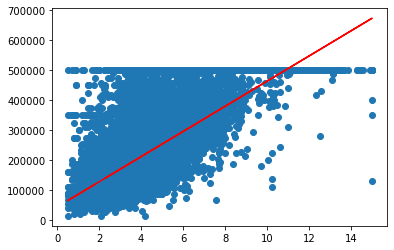

In [61]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred, color ='r')
plt.show

### X_test Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

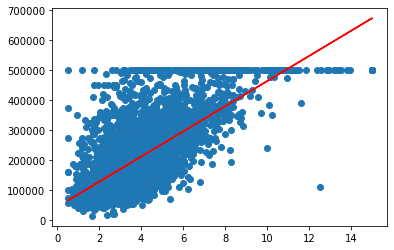

In [62]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred, color ='r')
plt.show